# Hardwick 2022

- https://www.nature.com/articles/s41587-022-01231-3

In [1]:
import scanpy as sc
import os,sys,glob
import pandas as pd
import numpy as np
import anndata as ad

In [3]:
opt_create_folder = True
if opt_create_folder:
    fs = glob.glob('/home/sonic/scData/Hardwick2022/GSE178175_RAW/*') 
    fs = list(set([f.split('/')[5].split('_')[1] for f in fs]))
    for f in fs:
        fs1 = glob.glob('/home/sonic/scData/Hardwick2022/GSE178175_RAW/*' + f + '*')
        os.system('rm -rf /home/sonic/scData/Hardwick2022/' + f)
        os.system('mkdir /home/sonic/scData/Hardwick2022/' + f)
        for f1 in fs1:
            if 'genes' in f1:
                cmd = ' '.join(['cp', f1, '/home/sonic/scData/Hardwick2022/' + f + '/features.tsv.gz'])
            else:
                cmd = ' '.join(['cp', f1, '/home/sonic/scData/Hardwick2022/' + f + '/' + f1.split('_')[-1]])
            os.system(cmd)
else:
    print ('Files are exist')

In [5]:
!ls /home/sonic/scData/Hardwick2022

FCtx1  FCtx2  GSE178175_RAW  GSE178175_RAW.tar	HIPP  PFC  RAW


In [6]:
samples = ['FCtx1','FCtx2']

In [7]:
list_data = []
for f in samples:
    adata1 = sc.read_10x_mtx('/home/sonic/scData/Hardwick2022/' + f)
    
    # Filter low quality genes or cells
    sc.pp.filter_cells(adata1, min_counts=50)
    
    # mitochondrial genes
    adata1.var["mt"] = adata1.var_names.str.startswith("MT-")
    sc.pp.calculate_qc_metrics(adata1, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
    adata1 = adata1[adata1.obs['pct_counts_mt'] < 4, :]
    adata1 = adata1[adata1.obs['n_genes_by_counts'] < 7500, :]
    
    # Update information
    adata1.name = f
    adata1.obs['sampleID'] = f
    adata1.obs_names = [f'{adata1.name}_{i}' for i in adata1.obs_names]
    list_data.append(adata1)

/tmp/ipykernel_407824/4234123335.py:16: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs['sampleID'] = f
/tmp/ipykernel_407824/4234123335.py:16: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata1.obs['sampleID'] = f


In [8]:
adata = ad.concat(list_data, join="outer")

In [9]:
adata

AnnData object with n_obs × n_vars = 14628 × 33538
    obs: 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sampleID'

In [10]:
adata.obs

,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,sampleID
FCtx1_AAACCCAAGCCTGTGC-1,10456.0,3409,10456.0,217.0,2.075363,FCtx1
FCtx1_AAACCCACAAGAAATC-1,14939.0,4830,14939.0,93.0,0.622532,FCtx1
FCtx1_AAACCCACAAGTGGTG-1,1371.0,989,1371.0,2.0,0.145879,FCtx1
FCtx1_AAACCCAGTAATCAAG-1,6217.0,2378,6217.0,64.0,1.029435,FCtx1
FCtx1_AAACCCAGTACCTATG-1,5078.0,2478,5078.0,152.0,2.993304,FCtx1
...,...,...,...,...,...,...
FCtx2_TTTGTTGGTGTTCAGT-1,27398.0,6758,27398.0,67.0,0.244543,FCtx2
FCtx2_TTTGTTGGTTAGAAAC-1,8193.0,3151,8193.0,71.0,0.866593,FCtx2
FCtx2_TTTGTTGGTTTGGAAA-1,8353.0,3185,8353.0,6.0,0.071830,FCtx2
FCtx2_TTTGTTGTCACCTCAC-1,3173.0,1801,3173.0,2.0,0.063032,FCtx2


In [11]:
# Update information
adata.obs['Assay'] = "10x Chromium 3' v3"
adata.obs['Library'] = "snRNA"
adata.obs['Brain_Region'] = 'BA9'
adata.obs['Hemisphere'] = 'A'
adata.obs['batch'] = 'Unknown'
adata.obs['Race'] = 'Unknown'
adata.obs['PMI'] = 'Unknown'
adata.obs['Stage'] = 'Adult'
adata.obs['Dataset'] = 'Hardwick'
adata.obs['Diagnosis'] = 'normal'

adata.obs.loc[adata.obs['sampleID'].str.contains('FCtx1'), 'Sex'] = 'M'
adata.obs.loc[adata.obs['sampleID'].str.contains('FCtx2'), 'Sex'] = 'M'
adata.obs.loc[adata.obs['sampleID'].str.contains('FCtx1'), 'Age'] = (68 * 365) + 365
adata.obs.loc[adata.obs['sampleID'].str.contains('FCtx2'), 'Age'] = (61 * 365) + 365

In [12]:
adata.obs

,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,sampleID,Assay,Library,Brain_Region,Hemisphere,batch,Race,PMI,Stage,Dataset,Diagnosis,Sex,Age
FCtx1_AAACCCAAGCCTGTGC-1,10456.0,3409,10456.0,217.0,2.075363,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,Unknown,Unknown,Unknown,Adult,Hardwick,normal,M,25185.0
FCtx1_AAACCCACAAGAAATC-1,14939.0,4830,14939.0,93.0,0.622532,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,Unknown,Unknown,Unknown,Adult,Hardwick,normal,M,25185.0
FCtx1_AAACCCACAAGTGGTG-1,1371.0,989,1371.0,2.0,0.145879,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,Unknown,Unknown,Unknown,Adult,Hardwick,normal,M,25185.0
FCtx1_AAACCCAGTAATCAAG-1,6217.0,2378,6217.0,64.0,1.029435,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,Unknown,Unknown,Unknown,Adult,Hardwick,normal,M,25185.0
FCtx1_AAACCCAGTACCTATG-1,5078.0,2478,5078.0,152.0,2.993304,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,Unknown,Unknown,Unknown,Adult,Hardwick,normal,M,25185.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FCtx2_TTTGTTGGTGTTCAGT-1,27398.0,6758,27398.0,67.0,0.244543,FCtx2,10x Chromium 3' v3,snRNA,BA9,A,Unknown,Unknown,Unknown,Adult,Hardwick,normal,M,22630.0
FCtx2_TTTGTTGGTTAGAAAC-1,8193.0,3151,8193.0,71.0,0.866593,FCtx2,10x Chromium 3' v3,snRNA,BA9,A,Unknown,Unknown,Unknown,Adult,Hardwick,normal,M,22630.0
FCtx2_TTTGTTGGTTTGGAAA-1,8353.0,3185,8353.0,6.0,0.071830,FCtx2,10x Chromium 3' v3,snRNA,BA9,A,Unknown,Unknown,Unknown,Adult,Hardwick,normal,M,22630.0
FCtx2_TTTGTTGTCACCTCAC-1,3173.0,1801,3173.0,2.0,0.063032,FCtx2,10x Chromium 3' v3,snRNA,BA9,A,Unknown,Unknown,Unknown,Adult,Hardwick,normal,M,22630.0


In [13]:
# Barcode가 실제 작동하는지 확인하기 위해 UMAP
adata_int = adata.copy()
sc.pp.normalize_total(adata_int)
sc.pp.log1p(adata_int)

In [14]:
adata_int

AnnData object with n_obs × n_vars = 14628 × 33538
    obs: 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sampleID', 'Assay', 'Library', 'Brain_Region', 'Hemisphere', 'batch', 'Race', 'PMI', 'Stage', 'Dataset', 'Diagnosis', 'Sex', 'Age'
    uns: 'log1p'

In [15]:
sc.pp.highly_variable_genes(adata_int, n_top_genes=2000)
sc.tl.pca(adata_int)
sc.pp.neighbors(adata_int, n_neighbors=10, n_pcs=50)

/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
sc.tl.umap(adata_int)
sc.tl.leiden(adata_int, resolution=0.5)

/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


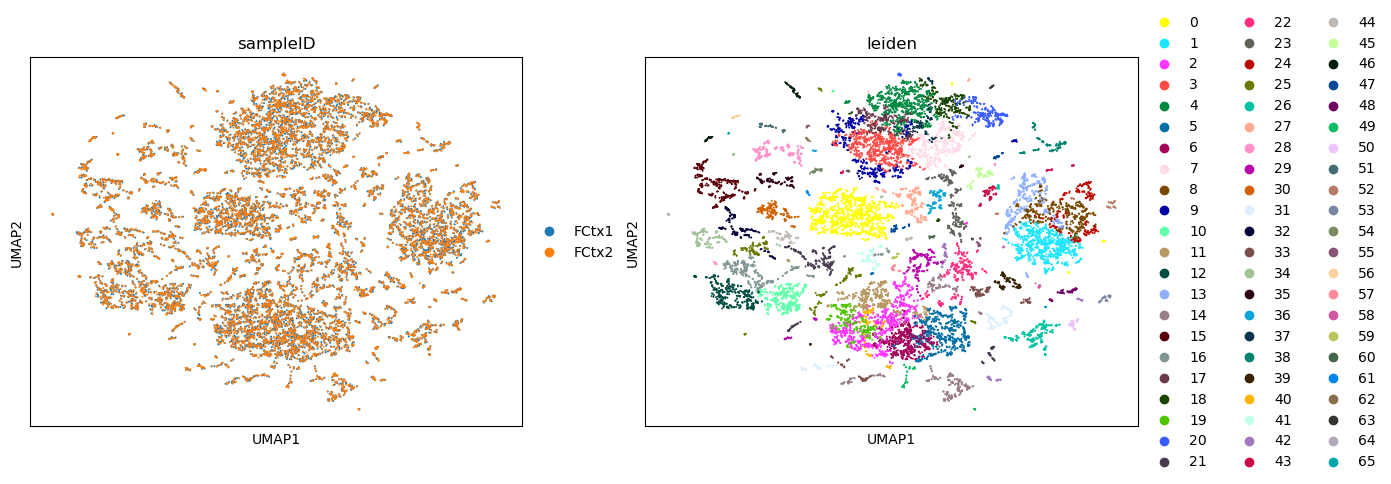

In [17]:
sc.pl.umap(adata_int, color=['sampleID', 'leiden'])

# Annotation using reference data (Healthy brains from Morabito 2021)

In [19]:
adata_ref = sc.read_h5ad('/home/sonic/scData/anndata/Morabito2021.h5ad')

In [20]:
sc.pp.normalize_total(adata_ref)
sc.pp.log1p(adata_ref)
sc.pp.highly_variable_genes(adata_ref, n_top_genes=2000)
sc.tl.pca(adata_ref)
sc.pp.neighbors(adata_ref, n_neighbors=10, n_pcs=50)
sc.tl.umap(adata_ref)
sc.tl.leiden(adata_ref, resolution=0.5)

/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


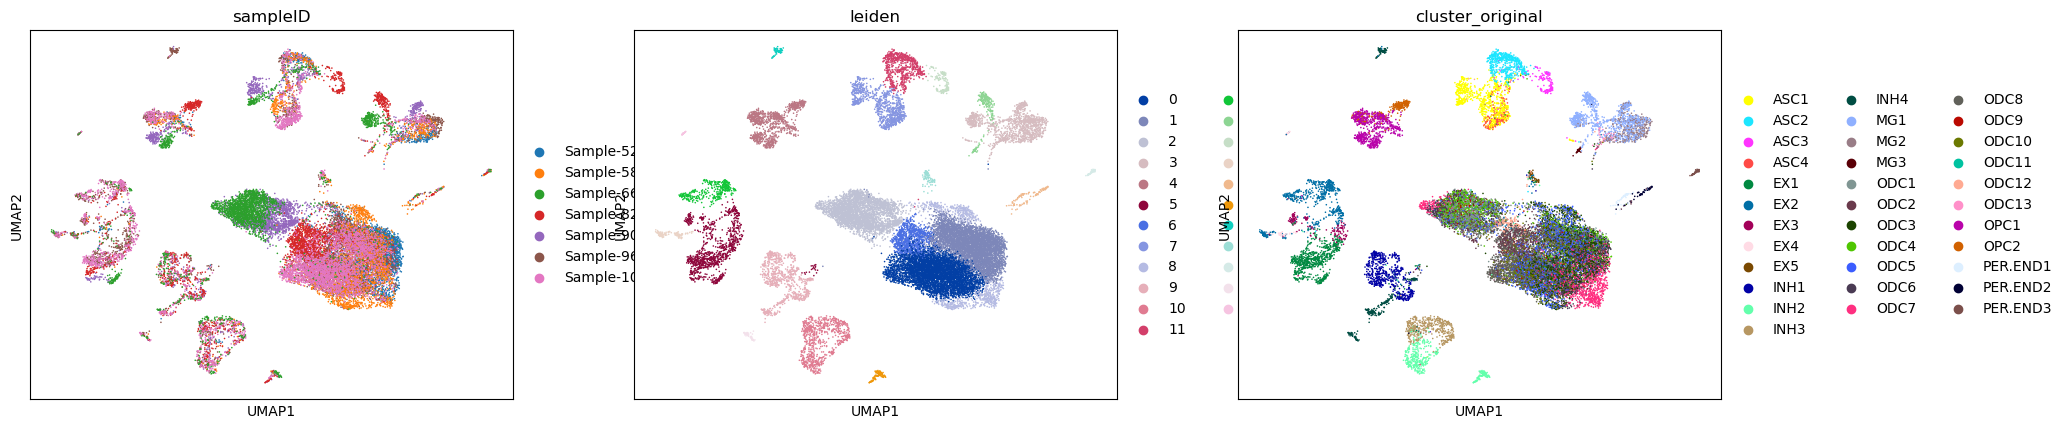

In [21]:
sc.pl.umap(adata_ref, color=['sampleID', 'leiden', 'cluster_original'])

In [22]:
var_names = adata_ref.var_names.intersection(adata_int.var_names)
adata_ref = adata_ref[:, var_names]
adata_int = adata_int[:, var_names]

In [23]:
sc.tl.ingest(adata_int, adata_ref, obs='cluster_original')

/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


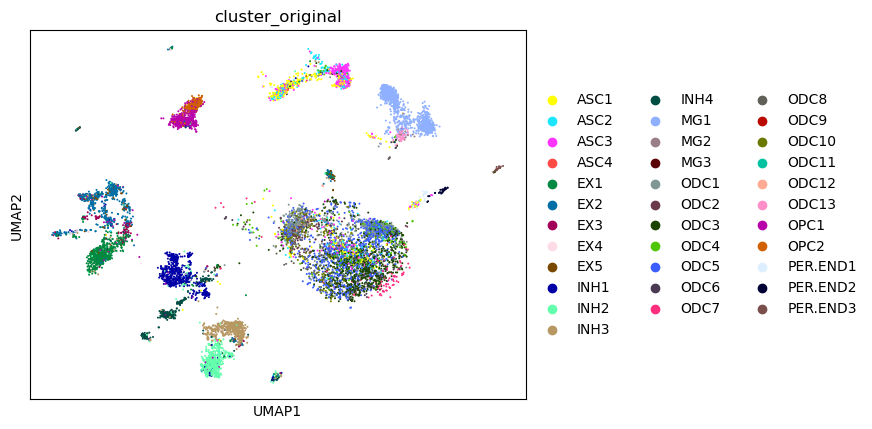

In [24]:
sc.pl.umap(adata_int, color=['cluster_original'], wspace=0.5)

/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


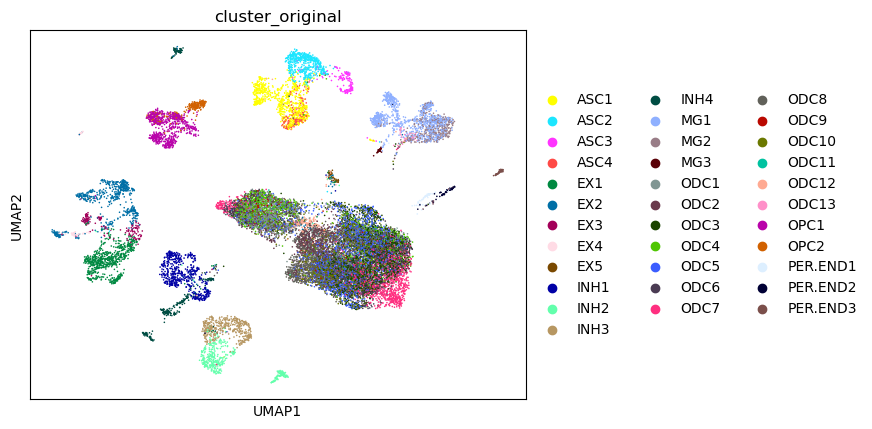

In [25]:
sc.pl.umap(adata_ref, color=['cluster_original'], wspace=0.5)

In [26]:
# Update the cell type
adata_int.obs.loc[adata_int.obs['cluster_original'].str.contains('EX'), 'cluster_main'] = 'Ext'
adata_int.obs.loc[adata_int.obs['cluster_original'].str.contains('INH'), 'cluster_main'] = 'IN'
adata_int.obs.loc[adata_int.obs['cluster_original'].str.contains('MG'), 'cluster_main'] = 'MG'
adata_int.obs.loc[adata_int.obs['cluster_original'].str.contains('ASC'), 'cluster_main'] = 'Astro'
adata_int.obs.loc[adata_int.obs['cluster_original'].str.contains('ODC'), 'cluster_main'] = 'OD'
adata_int.obs.loc[adata_int.obs['cluster_original'].str.contains('OPC'), 'cluster_main'] = 'OPC'
adata_int.obs.loc[adata_int.obs['cluster_original'].str.contains('PER.END'), 'cluster_main'] = 'Others'

/home/sonic/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


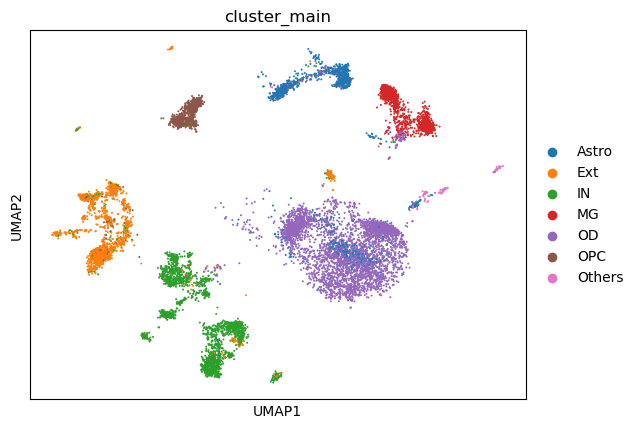

In [27]:
sc.pl.umap(adata_int, color=['cluster_main'], wspace=0.5)

In [28]:
sum(adata.obs.index == adata_int.obs.index)

14628

In [29]:
# Update the cluster names
adata.obs = adata_int.obs

In [31]:
adata.write('/home/sonic/scData/anndata/Hardwick2022.h5ad')

In [35]:
# adata1 = sc.read_h5ad('HCA_ZhangPD_normal.h5ad')

In [36]:
adata.obs

,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,sampleID,Assay,Library,Brain_Region,Hemisphere,...,Race,PMI,Stage,Dataset,Diagnosis,Sex,Age,leiden,cluster_original,cluster_main
FCtx1_AAACCCAAGCCTGTGC-1,10456.0,3409,10456.0,217.0,2.075363,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,...,Unknown,Unknown,Adult,Hardwick,normal,male,25185.0,6,ODC10,OD
FCtx1_AAACCCACAAGAAATC-1,14939.0,4830,14939.0,93.0,0.622532,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,...,Unknown,Unknown,Adult,Hardwick,normal,male,25185.0,5,EX1,Ext
FCtx1_AAACCCACAAGTGGTG-1,1371.0,989,1371.0,2.0,0.145879,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,...,Unknown,Unknown,Adult,Hardwick,normal,male,25185.0,3,OPC1,OPC
FCtx1_AAACCCAGTAATCAAG-1,6217.0,2378,6217.0,64.0,1.029435,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,...,Unknown,Unknown,Adult,Hardwick,normal,male,25185.0,10,MG1,MG
FCtx1_AAACCCAGTACCTATG-1,5078.0,2478,5078.0,152.0,2.993304,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,...,Unknown,Unknown,Adult,Hardwick,normal,male,25185.0,8,ASC3,Astro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FCtx1_TTTGTTGGTGTTCAGT-1,27398.0,6758,27398.0,67.0,0.244543,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,...,Unknown,Unknown,Adult,Hardwick,normal,male,25185.0,54,EX1,Ext
FCtx1_TTTGTTGGTTAGAAAC-1,8193.0,3151,8193.0,71.0,0.866593,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,...,Unknown,Unknown,Adult,Hardwick,normal,male,25185.0,4,ODC5,OD
FCtx1_TTTGTTGGTTTGGAAA-1,8353.0,3185,8353.0,6.0,0.071830,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,...,Unknown,Unknown,Adult,Hardwick,normal,male,25185.0,10,MG1,MG
FCtx1_TTTGTTGTCACCTCAC-1,3173.0,1801,3173.0,2.0,0.063032,FCtx1,10x Chromium 3' v3,snRNA,BA9,A,...,Unknown,Unknown,Adult,Hardwick,normal,male,25185.0,2,ASC1,Astro
